# Regression analysis

This  is the newest survey from Stack Overflow (2024), this survey about how developers learn and level up, which tools they're using, and which ones they want. Analysing the survey can help with understanding the labour market, and which study tools and techniques can help to grow.

My main goal is to create regression model for predict the annual salary and also provide some analysis

In [2]:
import pandas as pd
import sklearn.ensemble as sklearn_ensemble
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
data_full = pd.read_csv("datasets/stackoverflow_result.csv")

In [4]:
data_full.head()

,Unnamed: 0,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


I will select the most relevant columns from the dataset and divide them into two dataframes. The first dataframe will contain columns related to learning and education, while the second one will focus on employment and work-related aspects.

In [5]:
df_learning = data_full[["ResponseId", "MainBranch", 'Age', "CodingActivities", "EdLevel", "LearnCode", "LearnCodeOnline", 'LearnCodeCoursesCert', "LanguageHaveWorkedWith", "ConvertedCompYearly"]]

df_work = pd.DataFrame(data_full[['Age', "Employment", "RemoteWork", 'YearsCode', 'YearsCodePro', 'DevType', 'LanguageHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'ConvertedCompYearly']])

### Data processing

At the begginning I'm going to remove all rows with NaN in "ConvertedCompYearly", because according to my task, this column will be the target variable.
Firstly I wanted to replace all values with median or average values but because almost 50% of all values is NaN, I guess it will be not so good. Instead, I'm going to drop all rows with missing values in this column

In [6]:
data_full = data_full.dropna(subset=["ConvertedCompYearly"])

In [7]:
data_full

,Unnamed: 0,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,2490,2491,I agree,I am a developer by profession,65 years or older,"Employed, full-time",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Sch...,...,1-2 times a week,1-2 times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Continuous integ...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,180000.0
2492,2492,2493,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Hackathons (v...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,155000.0
2493,2493,2494,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Books / Physical media;Online Courses or Certi...,...,Never,3-5 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,NaN,Appropriate in length,Easy,74963.0
2496,2496,2497,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote,

Now my aim is to convert all objects type columns into numerical values

In [8]:
data_full.dtypes

Unnamed: 0               int64
ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 85, dtype: object

In our data we see that almost all coulmn are object types, we need to convert them to numeric types for further analysis

#### Age processing

I will begin with age processing

In [9]:
data_full.Age.value_counts(dropna=False)

Age
25-34 years old       646
35-44 years old       380
45-54 years old       127
18-24 years old       125
55-64 years old        50
65 years or older       6
Under 18 years old      2
Name: count, dtype: int64

As we see there are 8 types of age, I will simply replace string values with numerical values

In [10]:
data_full.Age = data_full.Age.replace({
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '18-24 years old': 21,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65,
    'Under 18 years old': 17.5,
    'Prefer not to say': np.mean([29.5, 39.5, 21, 49.5, 59.5, 65, 17.5])
})

C:\Users\HP\AppData\Local\Temp\ipykernel_15500\3851193413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_full.Age = data_full.Age.replace({


#### Employment processing

In [11]:
data_full.Employment.head()

1                                  Employed, full-time
2                                  Employed, full-time
3                                  Employed, full-time
4    Employed, full-time;Independent contractor, fr...
5                                  Employed, full-time
Name: Employment, dtype: object

Here we see that there is a NaN values, also in or column located different elements separeted by commas and ";"
First i would split all the values and see how many values there including NaN values

In [12]:
data_full.Employment.str.split('[,;]').explode().value_counts(dropna=False)

Employment
Employed                  1236
 full-time                1192
Independent contractor     204
 freelancer                204
 or self-employed          204
 part-time                  44
Retired                      1
Name: count, dtype: int64

I decided to chose one hot encoding and divide this column into smaller ones

In [13]:
data_full_employed = data_full["Employment"].str.replace(";", ",").str.get_dummies(sep=',')

#### Nominative column processing

For all other remaining columns with nominal values I'm also going to use one hot encoding
NaN i will fill with "Unknown"

In [14]:
data_full.RemoteWork.value_counts(dropna=False)

RemoteWork
Hybrid (some remote, some in-person)    604
Remote                                  531
In-person                               200
NaN                                       1
Name: count, dtype: int64

In [15]:
data_full_remote_work = data_full.RemoteWork.fillna('Unknown').str.get_dummies()
data_full_devType = data_full.DevType.fillna('Unknown').str.get_dummies(sep=',')
data_full_LanguageHaveWorkedWith = data_full.LanguageHaveWorkedWith.fillna('Unknown').str.get_dummies(sep=';')
data_full_ToolsTechHaveWorkedWith = data_full.ToolsTechHaveWorkedWith.fillna('Unknown').str.get_dummies(sep=';')

I would also create two columns "Main Language" and "Main Tools" it would be the first value in cell

In [16]:
data_full_MainLanguage = data_full.LanguageHaveWorkedWith.str.split(';').str[0].explode().fillna('Unknown')
data_full_MainTool = data_full.ToolsTechHaveWorkedWith.str.split(';').str[0].explode().fillna('Unknown')

In [17]:
data_full.CodingActivities.str.split(';').explode().value_counts(dropna=False)

CodingActivities
Hobby                                                                  957
Professional development or self-paced learning from online courses    498
Contribute to open-source projects                                     402
Freelance/contract work                                                254
I don’t code outside of work                                           162
Bootstrapping a business                                               153
School or academic work                                                 68
Other (please specify):                                                 28
NaN                                                                      3
Name: count, dtype: int64

In [18]:
data_full_CodingActivities = data_full.CodingActivities.fillna('Unknown').str.get_dummies(sep=';')
data_full_EdLevel = data_full.EdLevel.fillna('Unknown').str.get_dummies(sep=';')
data_full_LearnCode = data_full.LearnCode.fillna('Unknown').str.get_dummies(sep=';')
data_full_LearnCodeOnline = data_full.LearnCodeOnline.fillna('Unknown').str.get_dummies(sep=';')
data_full_LearnCodeCoursesCert = data_full.LearnCodeCoursesCert.fillna('Unknown').str.get_dummies(sep=';')


In [19]:
data_full_LearnCodeCoursesCert

,Codecademy,Coursera,Other,Pluralsight,Skillsoft,Udacity,Udemy,Unknown,edX
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2490,0,0,0,0,0,0,0,1,0
2492,0,0,0,0,0,0,0,1,0
2493,1,1,1,0,0,0,1,0,0
2496,0,0,0,0,0,0,0,1,0


#### Processing numerical values

With numerical values will be much easier because all I need to do is change string digital values to integer

First let see is there something something that is not a number

In [20]:
data_full["YearsCode"].loc[~data_full["YearsCode"].str.isdigit().fillna(False)].value_counts(dropna=False)
# Here we take only such values that are digit but later with "~" it will mean that we take only non digit values

C:\Users\HP\AppData\Local\Temp\ipykernel_15500\1964401080.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_full["YearsCode"].loc[~data_full["YearsCode"].str.isdigit().fillna(False)].value_counts(dropna=False)


YearsCode
More than 50 years    3
Less than 1 year      2
NaN                   1
Name: count, dtype: int64

In [21]:
data_full_YearsCode = data_full.YearsCode.replace({'Less than 1 year': 1,
                                'More than 50 years': 50})
data_full_YearsCode = pd.to_numeric(data_full_YearsCode)
data_full_YearsCode = data_full_YearsCode.fillna(data_full_YearsCode.mean())

In [22]:
data_full_YearsCodePro = data_full.YearsCodePro.replace({'Less than 1 year': 1,
                                'More than 50 years': 50})
data_full_YearsCodePro = pd.to_numeric(data_full_YearsCodePro)
data_full_YearsCodePro = data_full_YearsCodePro.fillna(data_full_YearsCodePro.mean())

In [23]:
data_full['ConvertedCompYearly'].describe()

count    1.336000e+03
mean     9.074788e+04
std      2.534016e+05
min      1.000000e+00
25%      4.223850e+04
50%      7.075050e+04
75%      1.104538e+05
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64

Here we see that there is huge difference between 75% and max value, that mean that we have large deviation

<Axes: xlabel='ConvertedCompYearly'>

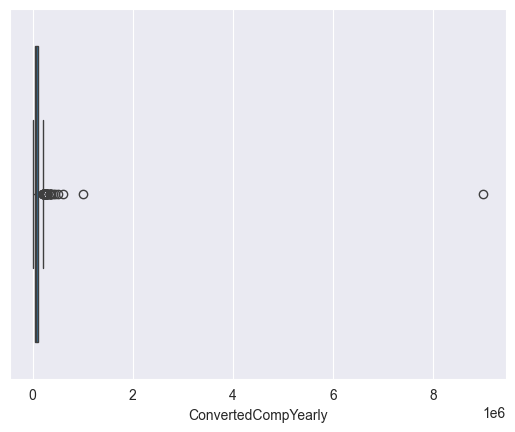

In [24]:
sns.boxplot(data_full, x='ConvertedCompYearly')

The diagram also confirm that, someone wrote that received 9 millions per year

In [25]:
data_full['ConvertedCompYearly'] = data_full['ConvertedCompYearly'].where(
    data_full['ConvertedCompYearly'] < 500000, 
    data_full['ConvertedCompYearly'].mean()
)

In [26]:
data_full['ConvertedCompYearly'].isna().sum()

np.int64(0)

In [27]:
data_full['ConvertedCompYearly']

1       285000.0
2       250000.0
3       156000.0
4        23456.0
5        96828.0
          ...   
2490    180000.0
2492    155000.0
2493     74963.0
2496     36368.0
2497     34954.0
Name: ConvertedCompYearly, Length: 1336, dtype: float64

In [28]:
df_work_processed = pd.concat([
    data_full.Age,
    data_full_employed,
    data_full_remote_work,
    data_full_devType,
    data_full_LanguageHaveWorkedWith,
    data_full_ToolsTechHaveWorkedWith,
    data_full_YearsCode,
    data_full_YearsCodePro,
    data_full.ConvertedCompYearly
], axis=1)



In [29]:
df_learning_processed = pd.concat([
    data_full.Age,
    data_full_CodingActivities,
    data_full_EdLevel,
    data_full_LearnCode,
    data_full_LearnCodeOnline,
    data_full_LearnCodeCoursesCert,
    data_full.ConvertedCompYearly
], axis=1)

In [30]:
df_work_processed.dtypes

Age                    float64
 freelancer              int64
 full-time               int64
 or self-employed        int64
 part-time               int64
                        ...   
pnpm                     int64
tunit                    int64
YearsCode              float64
YearsCodePro           float64
ConvertedCompYearly    float64
Length: 155, dtype: object

# Work analysis

#### Corelation analysis

For calculate correlation exists differents method like: Pearson correlation, Spearman correlation, Kendall correlation.
Since my data doesn't have linear relationship  and has data outliers I won't to use Pearson method.
Also for estimate feature importance could be used random forest

###### Pearson method

In [31]:
target_corr = df_work_processed.corr(method="kendall")['ConvertedCompYearly']
top_correlations = target_corr.sort_values(ascending=False)
top_correlations

ConvertedCompYearly    1.000000
YearsCodePro           0.296850
YearsCode              0.280814
Age                    0.279580
Remote                 0.142000
                         ...   
 part-time            -0.078411
Unknown               -0.091953
Composer              -0.094947
PHP                   -0.111408
In-person             -0.136579
Name: ConvertedCompYearly, Length: 155, dtype: float64

###### Spearman method

In [32]:
spearman_corr = df_work_processed.corr(method="spearman")["ConvertedCompYearly"].sort_values(ascending=False)
print(spearman_corr.head(10))


ConvertedCompYearly          1.000000
YearsCodePro                 0.422475
YearsCode                    0.400087
Age                          0.361609
Remote                       0.173529
Terraform                    0.163081
Kubernetes                   0.144881
Homebrew                     0.136698
Senior Executive (C-Suite    0.112675
 etc.)                       0.112675
Name: ConvertedCompYearly, dtype: float64


###### Feature importance using random forest

In [33]:
x = df_work_processed.drop(columns=["ConvertedCompYearly"])
y = df_work_processed.ConvertedCompYearly

model = sklearn_ensemble.RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestRegressor(random_state=42)

<Axes: >

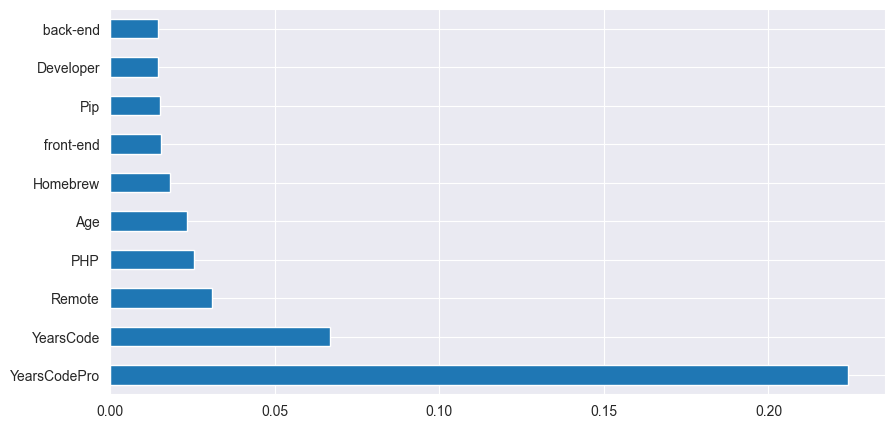

In [34]:
feature_importance = pd.Series(model.feature_importances_, index=x.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))

#### Factors visualisation

In [35]:
def MainLanguages_top(n):
    top_languages = data_full_MainLanguage.value_counts().head(n).index
    return data_full_MainLanguage.where(data_full_MainLanguage.isin(top_languages), 'unknown')
def MainTools_top(n):
    top_tools = data_full_MainTool.value_counts().head(n).index
    return data_full_MainTool.where(data_full_MainTool.isin(top_tools), 'unknown')

<Axes: xlabel='ConvertedCompYearly', ylabel='YearsCodePro'>

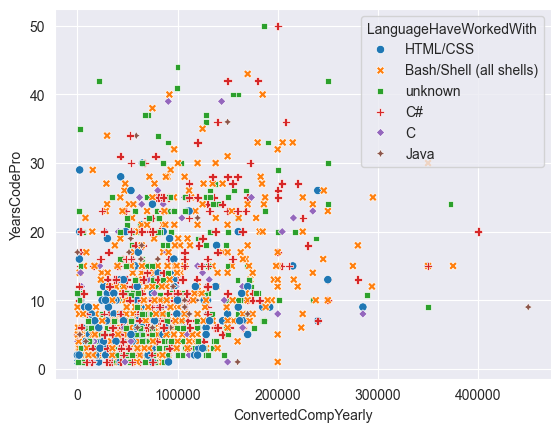

In [36]:
sns.scatterplot(df_work_processed, x='ConvertedCompYearly', y='YearsCodePro', style=MainLanguages_top(5), hue=MainLanguages_top(5))

<Axes: xlabel='ConvertedCompYearly', ylabel='LanguageHaveWorkedWith'>

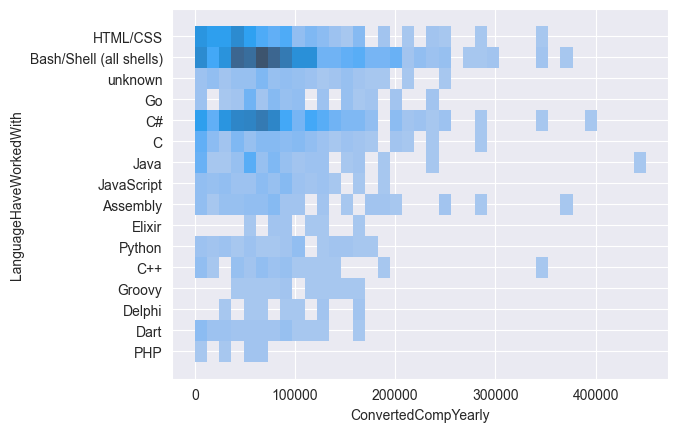

In [37]:
sns.histplot(df_work_processed, x='ConvertedCompYearly', y=MainLanguages_top(15))

<Axes: xlabel='Count', ylabel='LanguageHaveWorkedWith'>

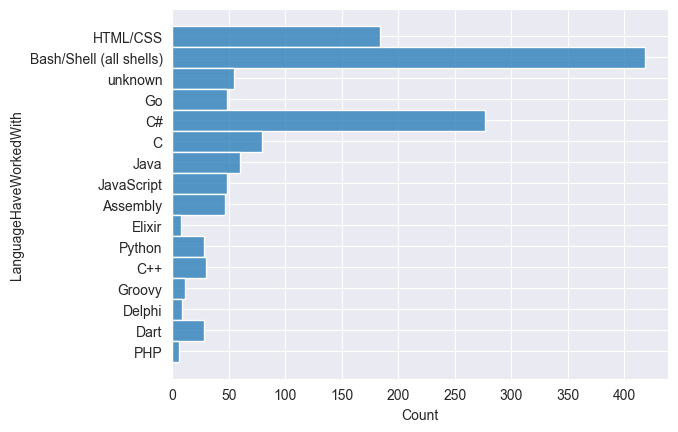

In [38]:
sns.histplot(df_work_processed, y=MainLanguages_top(15))

Tools

<Axes: xlabel='ConvertedCompYearly', ylabel='ToolsTechHaveWorkedWith'>

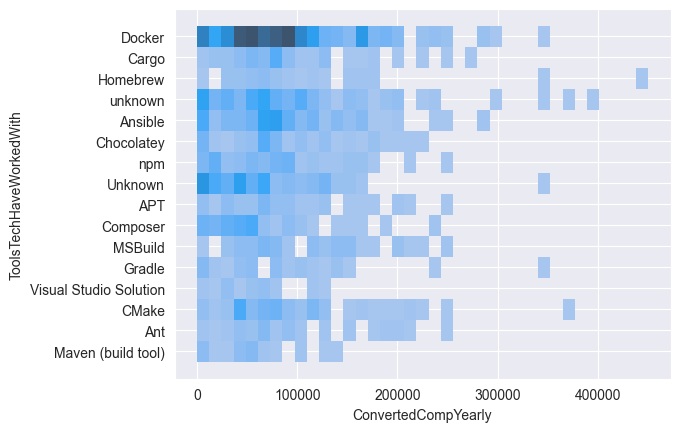

In [39]:
sns.histplot(df_work_processed, x='ConvertedCompYearly', y=MainTools_top(15))

<Axes: xlabel='Count', ylabel='ToolsTechHaveWorkedWith'>

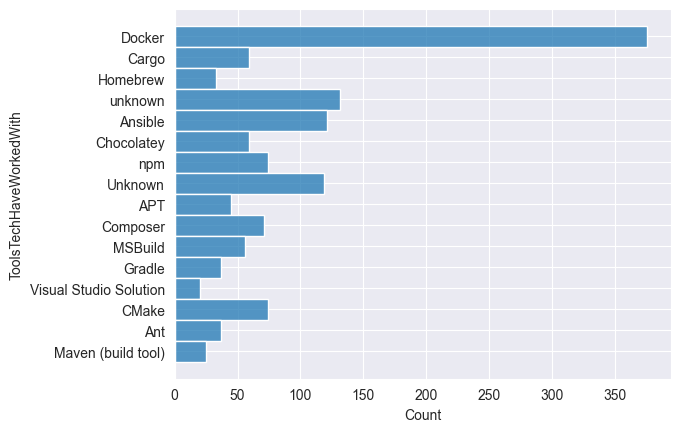

In [40]:
sns.histplot(y=MainTools_top(15))

# Analysing learning method

I would consider the annual salary as the factor of food learning method, if using one method will influence the salary it would mean that it is good learning method
Of course while analysing it also can show that there is no difference between learning methods

In [41]:
df_learning_processed.corr()['ConvertedCompYearly'].sort_values(ascending=False)

ConvertedCompYearly                                                                   1.000000
Age                                                                                   0.337329
Unknown                                                                               0.129707
Books / Physical media                                                                0.106240
I don’t code outside of work                                                          0.074647
Bootstrapping a business                                                              0.065441
Contribute to open-source projects                                                    0.063013
Other (Please specify):                                                               0.050766
Auditory material (e.g., podcasts)                                                    0.048437
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.041937
On the job training                               

We see that there is no difference between learning method, and taking in to account that this dataframe has colums that only related to learning, in the full dataset, the impact of learning methods may be even less

Then let's just explore the most popular methods

# Regression model

For regression model, I will use statsmodel

In [42]:
X = sm.add_constant(df_work_processed.drop(columns='ConvertedCompYearly'))
y = df_work_processed.ConvertedCompYearly

model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.345
Model:                             OLS   Adj. R-squared:                  0.266
Method:                  Least Squares   F-statistic:                     4.366
Date:                 Tue, 08 Apr 2025   Prob (F-statistic):           3.99e-46
Time:                         14:25:48   Log-Likelihood:                -16337.
No. Observations:                 1336   AIC:                         3.296e+04
Df Residuals:                     1191   BIC:                         3.372e+04
Df Model:                          144                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

From the summary, we can see that many variables have very high p-values (much greater than 0.05), suggesting they may act as noise and have little impact on the dependent variable. Additionally, the standard errors for these coefficients are notably high, indicating a lack of precision in their estimates.
The notes also indicate strong multicollinearity in the model.
Therefore I need to deal with it somehow

First I want to try clear all variables that have high variance inflation factor. VIF is an indicator that measures how much a variable is linearly related to other variables. When two variables are highly correlated, it leads to multicollinearity, which distorts the model’s ability to isolate individual effects and inflates standard errors

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# I take only these columns where VIF are less than 10
selected_features = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()

X_filtered = X[selected_features]

model = sm.OLS(y, X_filtered).fit()
print(model.summary())


C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\HP\Desktop\КПІ\Машинне навчання\MachineLearningCourse\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.277
Model:                             OLS   Adj. R-squared:                  0.213
Method:                  Least Squares   F-statistic:                     4.313
Date:                 Tue, 08 Apr 2025   Prob (F-statistic):           3.32e-37
Time:                         14:25:54   Log-Likelihood:                -16404.
No. Observations:                 1336   AIC:                         3.303e+04
Df Residuals:                     1226   BIC:                         3.360e+04
Df Model:                          109                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

And we still see that there is multicollinearity, so let's just take some variables manually

In [44]:
X = sm.add_constant(df_work_processed[["YearsCodePro", 'Remote', 'Homebrew', "Dart", "Go"]])

I tried to choose a set of features that are less likely to be correlated

In [45]:
y = df_work_processed.ConvertedCompYearly

model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.189
Model:                             OLS   Adj. R-squared:                  0.186
Method:                  Least Squares   F-statistic:                     61.88
Date:                 Tue, 08 Apr 2025   Prob (F-statistic):           4.26e-58
Time:                         14:25:54   Log-Likelihood:                -16481.
No. Observations:                 1336   AIC:                         3.297e+04
Df Residuals:                     1330   BIC:                         3.300e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.355e+04   2806.459    

Although I managed to remove the multicollinearity, the model still performs poorly,  also noticed that the target variable is highly skewed (Skew: 1.347), which may explain the large standard error
Let's check if the model really has skew using histplot

(array([103.,  52.,  58.,  62., 104., 100.,  91., 112., 111.,  75.,  65.,
         63.,  31.,  49.,  44.,  19.,  34.,  21.,  29.,  18.,  16.,   5.,
         21.,   6.,   8.,   1.,  10.,  11.,   0.,   0.,   1.,   4.,   3.,
          0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   2.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000000e+00, 9.0009800e+03, 1.8000960e+04, 2.7000940e+04,
        3.6000920e+04, 4.5000900e+04, 5.4000880e+04, 6.3000860e+04,
        7.2000840e+04, 8.1000820e+04, 9.0000800e+04, 9.9000780e+04,
        1.0800076e+05, 1.1700074e+05, 1.2600072e+05, 1.3500070e+05,
        1.4400068e+05, 1.5300066e+05, 1.6200064e+05, 1.7100062e+05,
        1.8000060e+05, 1.8900058e+05, 1.9800056e+05, 2.0700054e+05,
        2.1600052e+05, 2.2500050e+05, 2.3400048e+05, 2.4300046e+05,
        2.5200044e+05, 2.6100042e+05, 2.7000040e+05, 2.7900038e+05,
        2.8800036e+05, 2.9700034e+05, 3.0600032e+05, 3.1500030e+05,
        3.2400028e+05, 3.3300026e+05, 3.420002

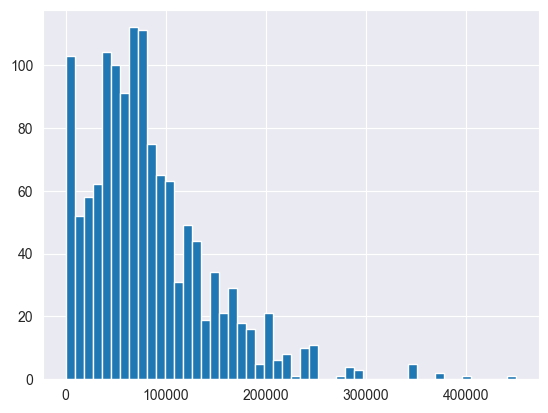

In [46]:
plt.hist(df_work_processed["ConvertedCompYearly"], bins=50)

As expected, the target has a strong positive skew. To address this, I tried applying a logarithmic transformation

In [47]:
y = np.log(df_work_processed.ConvertedCompYearly)

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.122
Model:                             OLS   Adj. R-squared:                  0.118
Method:                  Least Squares   F-statistic:                     36.89
Date:                 Tue, 08 Apr 2025   Prob (F-statistic):           1.74e-35
Time:                         14:25:54   Log-Likelihood:                -2047.8
No. Observations:                 1336   AIC:                             4108.
Df Residuals:                     1330   BIC:                             4139.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.3457      0.057    

After transformation, the standard error improved, but the R-squared dropped to 0.122. Moreover, the skew became negative, so the transformation didn’t help much


# Conclusion

My regression model demonstrates poor performance. One possible reason is the lack of a clear linear relationship in the data. Additionally, I encountered significant multicollinearity issues, which appeared after applying one-hot encoding. In the original dataset, columns like "LanguageHaveWorkedWith" often include similar sets of technologies, such as "CSS, JS, PHP, HTML." As a result, the corresponding one-hot encoded features tend to be highly correlated with each other, which leads to multicollinearity and affects the model's reliability.